In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)

In [2]:
def generate_dataset():
    # data is generated by y = 2x + e
    # where 'e' is sampled from a normal distribution
    x_batch = np.linspace(-1, 1, 101)
    y_batch = 2 * x_batch + np.random.randn(*x_batch.shape) * 0.3
    return x_batch, y_batch

In [3]:
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None,), name="x")
    y = tf.placeholder(tf.float32, shape=(None,), name="y")
    
    #The placeholder takes in dynamic size 1D value
    
    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name="W")
        b = tf.Variable(np.random.normal(), name="b")
        y_pred = tf.multiply(w, x) + b

        loss = tf.reduce_mean(tf.square(y_pred - y))
    return x, y, y_pred, loss

('loss:', 6.0127134)
('loss:', 5.1249642)
('loss:', 4.3944392)
('loss:', 3.7858684)
('loss:', 3.2738771)
('loss:', 2.8397915)
('loss:', 2.4695444)
('loss:', 2.1522982)
('loss:', 1.8795202)
('loss:', 1.6443639)
('loss:', 1.4412441)
('loss:', 1.2655408)
('loss:', 1.1133889)
('loss:', 0.9815253)
('loss:', 0.86717731)
('loss:', 0.76797456)
('loss:', 0.68188328)
('loss:', 0.6071524)
('loss:', 0.54227167)
('loss:', 0.48593524)
('loss:', 0.43701318)
('loss:', 0.3945269)
('loss:', 0.35762763)
('loss:', 0.32557946)
('loss:', 0.29774386)
('loss:', 0.2735666)
('loss:', 0.25256655)
('loss:', 0.23432599)
('loss:', 0.21848214)
('loss:', 0.20472009)
('loss:', 0.19276617)
('loss:', 0.18238282)
('loss:', 0.17336363)
('loss:', 0.1655294)
('loss:', 0.15872444)
('loss:', 0.15281346)
('loss:', 0.14767912)
('loss:', 0.14321926)
('loss:', 0.13934533)
('loss:', 0.13598037)
('loss:', 0.13305745)
('loss:', 0.13051857)
('loss:', 0.12831321)
('loss:', 0.12639759)
('loss:', 0.12473364)
('loss:', 0.1232883)
('loss:

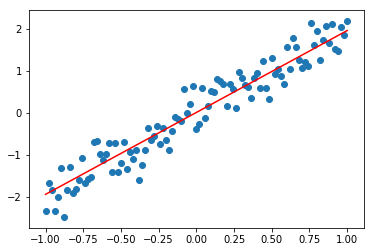

In [4]:
def run():
    x_batch, y_batch = generate_dataset()
    x, y, y_pred, loss = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)

        feed_dict = {x: x_batch, y: y_batch}
        for _ in range(60):
            loss_val, _ = session.run([loss, optimizer], feed_dict)
            print("loss:", loss_val)

        y_pred_batch = session.run(y_pred, {x: x_batch})
        
    plt.figure(1)
    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch, 'r')
    plt.savefig('plot.png')
run()